In [1]:
!cd /Users/devpatelio/Downloads/Coding/Python/pyTorch/image_mood
!git clone https://github.com/opencv/opencv.git

fatal: destination path 'opencv' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import os
import cv2

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim, functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToTensor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 

In [3]:
print(cv2.__version__)
!kaggle datasets download -d chiragsoni/ferdata

4.5.1
ferdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!cd /Users/devpatelio/Downloads/Coding/Python/pyTorch/image_mood

zsh:cd:1: no such file or directory: /Users/devpatelio/Downloads/Coding/Python/pyTorch/image_mood


In [6]:
import torchvision.transforms as transforms

label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
one_hot_template = torch.zeros(len(label_names), len(label_names))

for i in range(0, len(label_names)):
    one_hot_template[i][i] = 1

label_encoder_dict = {label_names[i]: one_hot_template[i] for i in range(0, len(label_names))}
    
class FacialImages(Dataset):
    def __init__(self, directory, label_directory_names):
        loader = os.listdir(str(directory))
        labels = label_directory_names
        self.dataset = []
        final_labelled_directories = []
        self.transform = transforms.Compose([transforms.ToTensor()])
        loader.remove(loader[1])

        for counter, i in enumerate(loader):
            final_labelled_directories.append([directory + '/' + i, i])

        for i, g in final_labelled_directories:
            label_loader = os.listdir(i)
            for x in label_loader:
                if x == '.ipynb_checkpoints': #cunt boi never broke again
                    continue
                with Image.open(i +'/' + x) as image:
                    trs_image = self.transform(image.resize((256, 256)))
                    self.dataset.append([trs_image.view(1, -1), label_encoder_dict[g], str(i +'/' + x)])
    
    def __len__(self):
        return(len(self.dataset))
    
    def __getitem__(self, index):
        image = self.dataset[index][0]
        label = self.dataset[index][1]
        directory = self.dataset[index][2]
        
        return [image, label, directory]
        
        
    def image_view(self, index):
        array = self.dataset[index][0].view(256, -1)
        return plt.imshow(array.numpy(), cmap='gray'), array

train_data = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/train', label_names)
test_data = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/test', label_names)

In [14]:
import cv2
import numpy as np
import dlib
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/shape_predictor_68_face_landmarks.dat")


path = train_data[9][2]
image = cv2.imread(path, 0)
rects = detector(image, 0)

facial_landmark_function(rects)

for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(image, rect)
    shape = face_utils.shape_to_np(shape)

    # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
cv2.imshow("Output", image)

(<matplotlib.image.AxesImage at 0x7fdf8673c3d0>,
 tensor([[0.0196, 0.0196, 0.0196,  ..., 0.0314, 0.0314, 0.0353],
         [0.0196, 0.0196, 0.0196,  ..., 0.0314, 0.0314, 0.0353],
         [0.0196, 0.0196, 0.0196,  ..., 0.0314, 0.0314, 0.0353],
         ...,
         [0.0627, 0.0627, 0.0588,  ..., 0.0431, 0.0431, 0.0431],
         [0.0627, 0.0627, 0.0588,  ..., 0.0431, 0.0431, 0.0431],
         [0.0667, 0.0667, 0.0588,  ..., 0.0431, 0.0431, 0.0431]]))

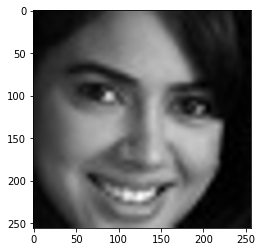

In [11]:
test_data.image_view(0)

In [5]:
# !pip install opencv-contrib-python

In [12]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.resize(cv2.imread('/Users/devpatelio/Downloads/image (8).png', 0), (1024, 1024))
faces = face_cascade.detectMultiScale(img)

for (x,y,w,h) in faces:
    face = (x,y,w,h)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

lbf = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/lbfmodel.yml'
landmark_detector  = cv2.face.LBPHFaceRecognizer_create()
landmark_detector.loadModel(LBFmodel)

_, landmarks = landmark_detector.fit(img, faces)

for landmark in landmarks:
    for x,y in landmark[0]:
        # display landmarks on "image_cropped"
        # with white colour in BGR and thickness 1
        cv2.circle(img, (x, y), 1, (255, 255, 255), 1)
        
cv2.imshow(img)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  99, ...,  27,  29, 255],
       ...,
       [255, 255, 197, ...,  26,  28, 255],
       [255, 255, 197, ...,  26,  28, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

AttributeError: 'cv2.face_LBPHFaceRecognizer' object has no attribute 'loadModel'

In [6]:
def list_string(path):
    std = ""
    for i in path:
        std = std+i
        return std

In [13]:
def landmark_view(coords):
    x_landmarks = []
    y_landmarks = []
    for i in coords:
        x_landmarks.append(-int(i[0]))
        y_landmarks.append(-int(i[1]))
    plt.scatter(x_landmarks, y_landmarks)
    plt.show()
    
def facial_landmark_function(predictor_output):
    for face in predictor_output:
        landmarks = shape_predictor(img, face)
        landmarks_list = []
        for i in range(0, landmarks.num_parts):
            landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))
        for landmark_num, xy in enumerate(landmarks_list, start = 1):
            cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
            cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)
        return landmarks_list

In [8]:
import dlib
import cv2
from matplotlib import pyplot as plt, transforms
from imutils import face_utils

# img = cv2.resize(cv2.imread('/Users/devpatelio/Downloads/Screen Shot 2021-04-20 at 1.47.17 PM.png', 0), (1024, 1024))

face_predictor = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("/Users/devpatelio/Downloads/Coding/Python/pyTorch/image_mood/shape_predictor_68_face_landmarks.dat")
landmarks_list = []

for x in range(0, 5):
    path = train_data[x][2]
    img = cv2.resize(cv2.imread(path, 0), (1024, 1024))
    detects = face_predictor(img, 0)

    for (i, detect) in enumerate(detects):
        shape = shape_predictor(img, detect) #image, bounding_box for restriction
        shape = face_utils.shape_to_np(shape)
        
        landmarks_list.append([(x, y) for (x, y) in shape])
    

In [9]:
print(len(landmarks_list))

3


In [10]:
print(landmarks_list)
# visualise the image with landmarks
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[[(22, 503), (50, 613), (85, 723), (128, 828), (184, 923), (267, 995), (377, 1035), (498, 1058), (621, 1054), (736, 1035), (824, 982), (892, 899), (933, 791), (950, 677), (953, 559), (949, 441), (931, 325), (87, 385), (143, 341), (217, 324), (291, 334), (368, 351), (569, 319), (629, 271), (696, 236), (772, 222), (842, 243), (502, 404), (521, 479), (540, 553), (558, 629), (470, 697), (517, 706), (566, 712), (605, 692), (639, 669), (198, 452), (244, 409), (307, 401), (365, 436), (309, 455), (248, 464), (613, 395), (654, 341), (716, 325), (771, 347), (732, 380), (672, 393), (400, 847), (462, 825), (522, 806), (570, 811), (611, 791), (670, 790), (736, 796), (687, 852), (635, 880), (589, 892), (540, 897), (473, 886), (423, 851), (527, 840), (575, 839), (618, 828), (713, 807), (622, 829), (580, 842), (533, 845)], [(-2, 434), (-10, 568), (-1, 697), (12, 819), (40, 933), (112, 1016), (232, 1054), (375, 1063), (524, 1057), (668, 1059), (809, 1045), (934, 1009), (1006, 926), (1025, 816), (1030, 

In [11]:
coordinates = facial_landmark_function(faces_in_image)
print(coordinates)

NameError: name 'faces_in_image' is not defined

In [ ]:
batch_size = 10
num_epochs = 50

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


dataiter = iter(trainloader)
data = dataiter.next()

keys = list(label_encoder_dict.keys())
values = list(label_encoder_dict.values())


print(data[0][0], data[1][0])
train_data.image_view(0)


In [96]:
print(data[0][0].shape)

torch.Size([1, 65536])


In [2]:
class Emotion_CNN(nn.Module):
    def __init__ (self):
        super(Emotion_CNN, self).__init__()
        #layer 1
        self.conv1 = nn.Conv2d(1, 128, kernel=2, stride=2) #in, out, kernel, stride
        self.conv1b = nn.BatchNorm2d(6) #output of previous step
        self.pool1 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0.3) #0-1 value 
        
        #layer 2
        self.conv2 = nn.Conv2d(128, 64, kernel=2, stride=1) #in, out, kernel, stride
        self.conv2b = nn.BatchNorm2d(6) #output of previous step
        self.pool2 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0.3) #0-1 value 
        
        #layer 3
        self.conv3 = nn.Conv2d(64, 32, kernel=4, stride=1) #in, out, kernel, stride
        self.conv3b = nn.BatchNorm2d(6) #output of previous step
        self.pool3 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0.3) #0-1 value 
        
        #layer 4
        self.conv4 = nn.Conv2d(32, 16, kernel=4, stride=1) #in, out, kernel, stride
        self.conv4b = nn.BatchNorm2d(6) #output of previous step
        self.pool4 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0.3) #0-1 value 
        
        #layer 5
        self.conv5 = nn.Conv2d(16, 8, kernel=4, stride=1) #in, out, kernel, stride
        self.conv5b = nn.BatchNorm2d(6) #output of previous step
        self.pool5 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0.3) #0-1 value 
        
        ##fully connected
        self.fc1 = nn.Linear(92415, 1400)
        self.fc2 = nn.Linear(1400, 700)
        self.fc3 = nn.Linear(700, 100)
        self.fc4 = nn.Linear(100, 7)
        
        self.soft = nn.Softmax(dim=1)
    
        
    def forward(self, x):
        x = self.pool1(F.relu(self.dropout(self.conv1b(self.conv1(x)))))
        x = self.pool2(F.relu(self.dropout(self.conv2b(self.conv2(x)))))
        x = self.pool3(F.relu(self.dropout(self.conv3b(self.conv3(x)))))
        x = self.pool4(F.relu(self.dropout(self.conv4b(self.conv4(x)))))
        x = self.pool5(F.relu(self.dropout(self.conv5b(self.conv5(x)))))

        x = x.flatten()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.soft(self.fc4(x))
        return x
        
cnn = Emotion_CNN()

NameError: name 'nn' is not defined

In [ ]:
#Layer 1 Conv: 127*127*128
#Layer 1 MaxPool2D: 63*63*128

#Layer 2 Conv: 62*62*64
